In [2]:
import numpy as np
X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
Y = np.array([1, 1, 1, 2, 2, 2])
from sklearn.naive_bayes import GaussianNB

clf = GaussianNB()
clf.fit(X, Y)

GaussianNB(priors=None)

In [3]:
print(clf.predict([[-0.8, -1]]))

[1]


In [2]:
from sklearn.datasets import load_iris
from sklearn import tree

iris = load_iris()

clf = tree.DecisionTreeClassifier()

clf.fit(iris.data, iris.target)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

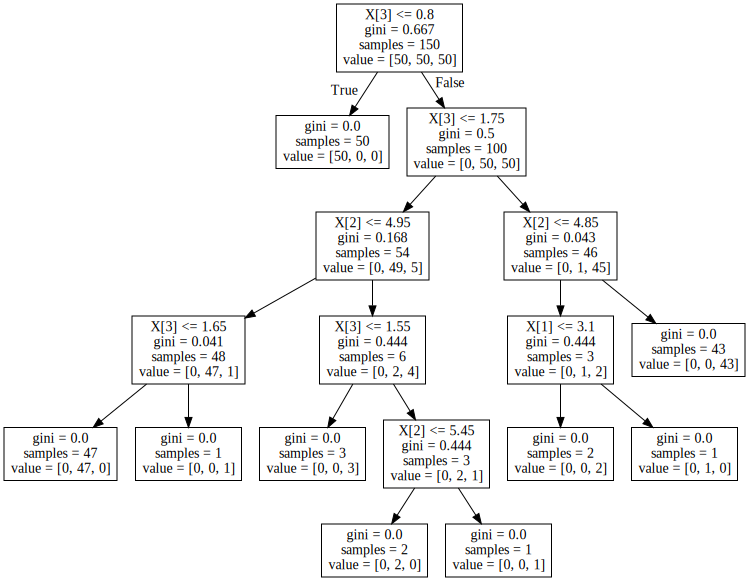

In [5]:
import graphviz

dot_data = tree.export_graphviz(clf, out_file=None)
graph = graphviz.Source(dot_data)
#graph.render("iris")
graph

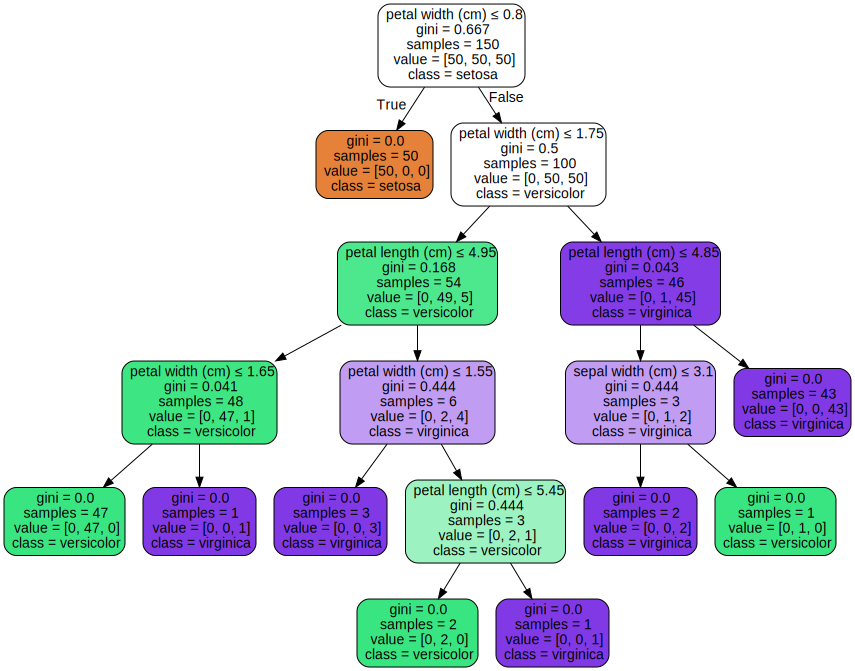

In [3]:
import graphviz

dot_data = tree.export_graphviz(clf, out_file=None, # doctest: +SKIP
                            feature_names=iris.feature_names,  # doctest: +SKIP
                            class_names=iris.target_names,  # doctest: +SKIP
                            filled=True, rounded=True,  # doctest: +SKIP
                            special_characters=True)  # doctest: +SKIP
graph = graphviz.Source(dot_data)
graph

In [6]:
clf.predict(iris.data[:1, :])

array([0])

In [7]:
# 可以根据决策树叶子树里训练样本中的相同类的分数，使得类预测成为可能:
clf.predict_proba(iris.data[:1, :])

array([[ 1.,  0.,  0.]])

## 熵公式

$$E(x) = - \sum_{x}P(x)log_{2}P(x)$$

> $P(x)$ 是给定类，即类 $x$ 中的样本分数，然后把所有的可能出现的类的结果加和


> 信息增益定义为父节点的熵，减去子节点的熵的加权平均。决策树算法会最大化信息增益。如果特征可以取多个不同值，该方法将帮助它找出在何处进行划分

In [16]:
import math

math.log(1, 2)

0.0

In [15]:
# 计算熵
import scipy.stats
print scipy.stats.entropy([2,2],base=2)

1.0


In [14]:
1 - (3./4) * 0.9183

0.31127499999999997

## 偏差、方差

> 高偏差机器学习算法实际上会忽略数据，他几乎没有能力学习任何数据，因此被称为偏差

> 高方差对数据过于敏感，并且只能复制曾经见过的东西，问题在于他在之前未见过的情况下反应非常差，泛化能力差

## 决策树缺点

* 容易过拟合，尤其是对于具有包含大量特征的数据时，复杂的决策树可能会过拟合数据

决策树一个很方的地方： 可以通过所谓的集成方法，从决策树出发构建更大规模的分类器